### Mushroom Classification using Decision Tree Algorithm 

#### Load packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Upload the data 

In [2]:
data = 'mushrooms.csv'
mushrooms = pd.read_csv(data)

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushrooms.shape

(8124, 23)

In [6]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
#Dataframe should include 'class', 'cap-shape', 'cap-surface', 'cap-color', 'odor', 'habitat'

mushrooms = mushrooms[['class','cap-shape','cap-surface','cap-color','odor','habitat']]
mushrooms

,class,cap-shape,cap-surface,cap-color,odor,habitat
0,p,x,s,n,p,u
1,e,x,s,y,a,g
2,e,b,s,w,l,m
3,p,x,y,w,p,u
4,e,x,s,g,n,g
...,...,...,...,...,...,...
8119,e,k,s,n,n,l
8120,e,x,s,n,n,l
8121,e,f,s,n,n,l
8122,p,k,y,n,y,l


In [9]:
#Extract the independent(X) and dependent(y) variables

X = mushrooms.drop(columns=['class'])
y = mushrooms['class']

#### Convert the data from categorical to numeric using Label Encoder and One Hot Encoder

In [10]:
#Use Label Encoder to convert the dependent variable to numeric

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)


[1 0 0 ... 0 1 0]


In [11]:
#Use One Hot Encoder to convert the independent variable to numeric

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

print(X)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Visualize the data

<AxesSubplot:xlabel='class', ylabel='count'>

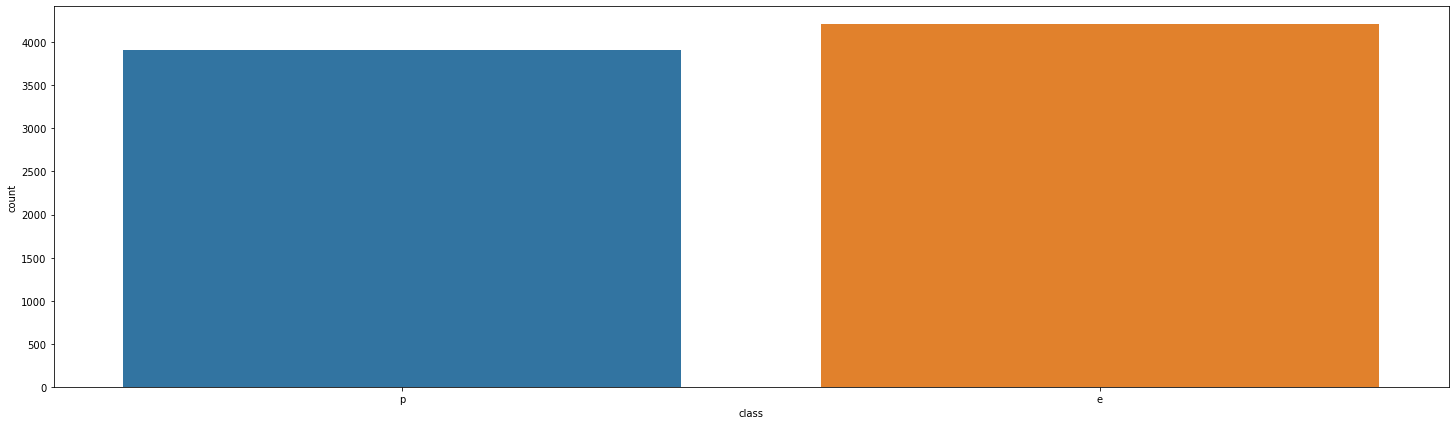

In [12]:
plt.figure(figsize=(25,7))
sns.countplot(x='class', data = mushrooms)

#### Decision Tree Method

In [13]:
# Split the data into the training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

In [14]:
# Train the Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Test the model

predictions = dtree.predict(X_test)
predictions

array([0, 1, 0, ..., 1, 1, 0])

#### Evaluate the model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
print(confusion_matrix(y_test,predictions))

[[1258    0]
 [   5 1175]]


In [19]:
2433/2438

0.9979491386382281